In [1]:
from linearalgebra import dot, Vector
from typing import List
inputs: List[List[float]] = [[1.,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],
                             [1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],
                             [1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],
                             [1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]


In [2]:
def predict(x: Vector, beta: Vector) -> float:
    '''assumes that the first element of x is 1'''
    return dot(x, beta)

In [3]:
def error(x: Vector, y: float, beta: Vector) -> float:
    return predict(x, beta) -y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
    return error(x, y, beta) ** 2

In [4]:
x = [1, 2, 3]
y = 30
beta = [4, 4, 4] 
assert error(x, y, beta) == -6
assert squared_error(x, y, beta) == 36

In [5]:
def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

assert sqerror_gradient(x, y, beta) == [-12, -24, -36]

In [6]:
import random
import tqdm
from linearalgebra import vector_mean
from GradientDescent import gradient_step

In [7]:
def least_squares_fit(xs: List[Vector], ys: List[float], learning_rate: float = 0.001, num_steps: int = 1000, batch_size: int = 1) -> Vector:
    '''find the beta that minimizes the sum of squared errors assuming the model y = dot(x, beta).'''
    # Start with a random guess
    guess = [random.random() for _ in xs[0]]
    for _ in tqdm.trange(num_steps, desc='least squares fit'):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start: start+batch_size]
            batch_ys = ys[start: start+batch_size]

            gradient = vector_mean([sqerror_gradient(x, y, guess) for
                            x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)
            return guess

# Goodness of Fit

In [8]:
from stati import daily_minutes_good

In [9]:
def multiple_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
    sum_of_squared_errors = sum(error(x, y, beta) ** 2 for x, y in zip(xs, ys))
    return 1.0 - sum_of_squared_errors/total_sum_of_squares(ys)

# Digression: The Bootstrap

In [15]:
from typing import TypeVar, Callable
from stati import median

In [28]:
X = TypeVar('X')
Stat = TypeVar('Stat')

def bootstrap_sample(data: List[X]) -> List[X]:
    '''randomly samples len(data) elements with replacement'''
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X], stats_fn: Callable[[List[X]],
                        Stat], num_samples: int) -> List[Stat]:
                        '''evaluates stats_fn on num_samples bootstrap samples from data'''
                        return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

In [17]:
close_to_100 = [99.5 + random.random() for _ in range(101)]
far_from_100 = ([99.5 + random.random()] + [random.random() for _ in range(50)]+[200 + random.random() for _ in range(50)])

In [18]:
print(close_to_100[:20])
print()
print(far_from_100[80:])

[99.69472648287179, 99.83368874199043, 100.34198540694547, 100.07057630154442, 100.154434019188, 99.67777032338851, 99.81934767019574, 99.74398589963401, 99.81241601090578, 99.6783987275397, 99.89911522469725, 99.72310837313239, 100.42291355437781, 99.67162409084683, 99.61502424626627, 99.81682472633186, 100.48222100144811, 99.76447805490325, 100.36076416812847, 100.11684552860494]

[200.6886587126914, 200.34354782843002, 200.412389124656, 200.68041711204776, 200.61474497975593, 200.50777751224487, 200.11654630430715, 200.91431593722427, 200.14797262957416, 200.4108082172633, 200.38115420757592, 200.54981541226843, 200.22413912300664, 200.155584890149, 200.33658334060672, 200.0633316256827, 200.29240830553812, 200.71614666935193, 200.93639584007104, 200.42132281581831, 200.95944521738983]


In [19]:
from stati import median, standard_deviation

In [29]:
median_close = bootstrap_statistic(close_to_100, median, 100)
median_far = bootstrap_statistic(far_from_100, median, 100)
print()
print('Printing median of close_to_100', median(close_to_100))
print('Printting median of far_from_100', median(far_from_100))


Printing median of close_to_100 100.01633287614193
Printting median of far_from_100 100.15966234815384


In [33]:
print('Median close', median_close[80:])
print()
print('Median far', median_far[:20])
print()
print(standard_deviation(median_close))
print(standard_deviation(median_far))

Median close [99.91996248702658, 100.0922919695546, 100.02298380164702, 100.11134020821935, 100.05115738426232, 100.04763066409834, 99.95722124061648, 99.99723747159659, 100.04763066409834, 100.05115738426232, 100.06670947999666, 100.04763066409834, 99.99026932116477, 100.06670947999666, 100.01114469279443, 100.05115738426232, 100.04763066409834, 100.02298380164702, 99.94011071595209, 100.01114469279443]

Median far [200.04319786067683, 0.9640970211462019, 200.155584890149, 0.8278570921016685, 0.9946489387282073, 0.9640970211462019, 0.9094753258025355, 0.9640970211462019, 200.0633316256827, 0.7661535024416132, 200.22413912300664, 0.9946489387282073, 0.8278570921016685, 0.9019488539163221, 0.9094753258025355, 0.7539540065493131, 100.15966234815384, 0.6405826279555157, 0.8851167943080618, 0.8851167943080618]

0.04847081719461058
95.72927582086777


In [102]:
import matplotlib.pyplot as plt
from collections import Counter

count = Counter(median_close)
keys = [round(i) for i in count.keys()]
count_median_far = Counter(median_far)
key_median_far = [round(i) for i in count_median_far.keys()]

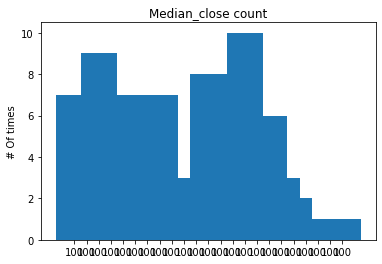

In [118]:
plt.bar(range(len(count)), count.values(), width=3)
plt.title("Median_close count")
plt.ylabel("# Of times")
plt.xticks(range(len(count)), keys)
plt.show()

In [ ]:
plt.bar(range(len(count_median_far)), count_median_far.values())
plt.title("Median_close count")
plt.ylabel("# Of times")
plt.xticks(range(len(count_median_far)), key_median_far)
plt.show()

# Standard Errors of Regression Coefficients

In [19]:
from typing import Tuple
import datetime

In [53]:
def estimate_sample_beta(pairs: List[Tuple[Vector, float]]):
    x_sample = [x for x, _ in pairs]
    y_sample = [y for _, y in pairs]
    beta = least_squares_fit(x_sample, y_sample,5000, 25)
    print('Bootstrap sample', beta)
    return beta

In [54]:
random.seed(0)
bootstrap_betas = bootstrap_statistic(list(zip(inputs, daily_minutes_good)), estimate_sample_beta, 100)

least squares fit:   0%|          | 0/25 [00:00&lt;?, ?it/s]
Bootstrap sample [301411.8193531761, 1808468.9946731539, 602823.4417549226, 301411.50843791576]
Bootstrap sample [331451.93822898593, 3314516.6202682676, 331451.64117596543, 0.16386054567557595]
Bootstrap sample [300086.1141704634, 900257.9283294219, 300085.7683560549, 300086.3470821586]
Bootstrap sample [158634.84035839527, 1586342.785302945, 1269074.6153709446, 0.13202027544551864]
Bootstrap sample [157199.55135666238, 1100390.7348479966, 785993.4580434909, 0.7270999543422898]
Bootstrap sample [351396.0856938165, 2811162.5165022113, 702791.3372853674, 0.2487736956630997]
Bootstrap sample [346522.8156547575, 2425658.609868624, 0.9276494299222889, 0.5978783972833935]
Bootstrap sample [66676.92677504082, 200030.98297496978, 666767.8363162137, 66677.31477399802]
Bootstrap sample [80256.48129694283, 642045.3921125871, 722300.8874181744, 0.5627357352457344]
Bootstrap sample [164310.228941115, 821549.3000312009, 657239.0789563797,

In [56]:
bootstap_standard_errors = [standard_deviation([beta[i] for beta in bootstrap_betas]) for i in range(4)]
print(bootstap_standard_errors)

[99138.1948049879, 1913858.961334884, 467683.94654216483, 124374.57023602404]
